# To design a resonator that will attenuate sound at the same low frequency of a side branch (quater wave tube) resonator

## Step 1: Calculate the resonant frequency of the side branch resonator
Resonant frequency of the side branch resonator is $$f = \frac{c}{4L_{eff}}$$ 
$c$ is the speed of sound and the effective length of the resonator is $$L_{eff}=L+0.3d$$ 
The equivalent internal diameter of the resonator is $$d=2\sqrt{\frac{S_{B}}{\pi}}$$
$S_{B}$ is the corss sectional area of the side branch resonator

## Step 2: Calculate the volume of the Helmholtz resonator
Resonant frequency of Helmholtz resonator is $$f=\frac{c}{2\pi}\sqrt{\frac{S_{neck}}{\hat{L}_{eff}V}}$$
The volume can be calculated as $$V=k^{2}\frac{S_{neck}}{\hat{L}_{eff}}$$
$k$ is the wave number given by $$k=\frac{\omega}{c}$$
$\hat{L}_{eff}$ is the effective 'neck' length $$\hat{L}_{eff}=\hat{L}+0.85r$$
$r$ is the equivalent radius of the 'neck' given as $$r=\sqrt{\frac{S_{neck}}{\pi}}$$

In [64]:
import math
import numpy as np

L = 0.2                      #Length of side branch resonator in m
SB = 5*1e-4                 #Cross sectional area of side branch resonator in m2
c= 343                       #Speed of sound in m/s
d=2*math.sqrt(SB/math.pi)
#d=0
Leff=L+0.3*d
f = c/(4*Leff)
print(f)
Lhat=0.03                    #Neck length in m
Sneck=5*1e-4                #Neck cross sectional area in m2
r=math.sqrt(Sneck/math.pi)   #Neck radius (equivalent) in m
#r=0
Lhateff=Lhat+0.85*r          #Effective necklength in m
k=2*math.pi*f/c              #wave number corresponding to the resonant frequency of the side branch resonator
V=Sneck/(np.square(k)*Lhateff)          #Volume of Helmholtz resonator
print(Lhateff)
print(V)

413.1148473980102
0.04072331321858568
0.00021439457672811478


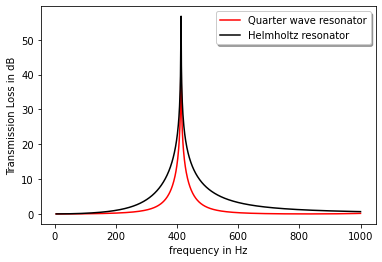

In [69]:
#Transmission Loss calculations
#TL of Side branch
import numpy as np
import matplotlib.pyplot as plt
freq = np.linspace(5,1000,1000)
S=10*1e-4
kn=2*np.pi*freq/c

TL_sb=10*np.log10((np.tan(kn*Leff)**2+4*(S/SB)**2)/(4*(S/SB)**2));
#TL of Helmholtz resonator
TL_hr=10*np.log10(1+((0.5*c/S)/((2*np.pi*freq*Lhateff/Sneck)-(c**2/(2*np.pi*freq*V))))**2);
plt.plot(freq,TL_sb,'r',freq,TL_hr,'k')
plt.legend(('Quarter wave resonator', 'Helmholtz resonator'),loc='upper right', shadow=True)
plt.xlabel("frequency in Hz")
plt.ylabel("Transmission Loss in dB")
plt.show()